#### How does classification happen with KNN?
* 1-Select the number of neighbors(k) k should not be 1(makes classification redundant)or even(can result in a tie)
* 2-Calcute the Euclidean distance of the k neighbors
* 3-Select neighbors in the vicinity of the new data
* 4- assign the new data point to that class for which the number of neighbors is maximum.

#### We will build a predictive model to predict the purchase decisions of a new customer using customer attributes like age and salary 

In [3]:
##### loading he libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('Social_Network_Ads.csv')
print('data is loaded')

data is loaded


In [5]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [7]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
X=data.iloc[:,[2,3]].values # the values function converts X into an array
y=data.iloc[:,4].values

In [9]:
print(type(X))

<class 'numpy.ndarray'>


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80,random_state=0)

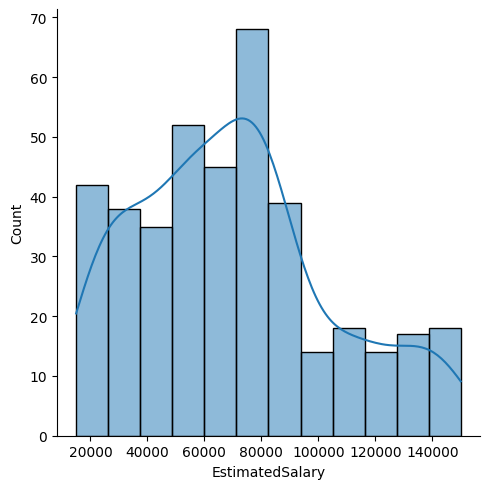

In [11]:
sns.displot(x=data['EstimatedSalary'],data=data,kde=True)
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

### Minkowski distance is a combination of Euclidean distance =sqrt((x2-x1)*2 -(y2-y1)*2) and the Manhattan distances.when we give p=2 it means euclidean distance metric is used to compute the distance between 2 points. if p=1 then manattan distance is used. The manhattan distance metric to compute the distance between two points is d(x,y)=sum(absolute(xi-yi))

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [16]:
####generating predictions:
pred=knn.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,pred)
cm

array([[54,  4],
       [ 1, 21]], dtype=int64)

In [18]:
####correct classifications=54+21,FP=4,FN=1

In [19]:
####accuracy=54+21/54+21+1+4

In [20]:
(54+21)/(54+21+4+1)

0.9375

In [21]:
#precision=54/58=0.93 #for the positive class
##recall=54/54+1=0.98 #for positive class only.


In [22]:
54/55

0.9818181818181818

In [23]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        58
           1       0.84      0.95      0.89        22

    accuracy                           0.94        80
   macro avg       0.91      0.94      0.92        80
weighted avg       0.94      0.94      0.94        80



In [24]:
#### final accuracy is 94%

In [157]:
new_cust = np.array([[0,1100],[24,2322]])
newpred = knn.predict(new_cust)

In [159]:
newpred

array([1, 1], dtype=int64)